## Introduction

This report has been prepared in response to the following Hackathon challenge organised by the Natural Environment Research Council (NERC) and Cranfield University.

#### NERC COVID-19 Hackathons :- Hackathon 1 – Air Quality 
Timeline - June 1 2020 09:00 to June 5 2020 23:59

####  Objectives of Hackathon

+ Is there a correlation between air quality and incidence and severity of COVID-19 infection?
+ What is the air quality threshold we need to meet to improve individual outcomes?

Is there a positive correlation between air quality (including NOx and particulate pollution levels) and the incidence and severity of COVID-19 infections (based on respiratory stress, a more effective distribution mechanism and greater virus longevity), and if so what is the air quality threshold level we need to reach in order to improve individual outcomes? In a post-lockdown environment, what measures can we put in place to ensure air quality levels stay below these threshold levels (reduced intensity of traffic; greater access to cyclists etc.) How do we manage the tensions between preserving air quality improvements, the use of mass transit systems and the need for social distancing?

### Table of contents

+ [1.0 Solution Approach](#1.0-Solution-Approach)
+ [2.0 Acquire Relevant Datasets](#2.0-Acquire-Relevant-Datasets)
 + [2.1 Air quality dataset](#2.1-Air-quality-dataset)
 + [2.2 COVID-19 dataset](#2.2-COVID-19-dataset)
 + [2.3 Population dataset](#2.3-Population-dataset)
+ [3.0 Explore, clean and wrangle datasets](#3.0-Explore,-clean-and-wrangle-datasets)
 + [3.1 Import python modules](#3.1-Import-python-modules)
 + [3.2 Read air quality dataset](#3.2-Read-air-quality-dataset) 
 + [3.3 Read Covid-19 dataset](#3.3-Read-Covid-19-dataset)
 + [3.4 Compare datasets for matching keys](#3.4-Compare-datasets-for-matching-keys)
 + [3.5 Check basic statistics for each dataset](#3.5-Check-basic-statistics-for-each-dataset) 
+ [4.0 Identify patterns and create visualisations](#4.0-Identify-patterns-and-create-visualisations)
 + [4.1 Iteration 1](#4.1-Iteration-1)
   + [4.1.1 Join air quality and Covid-19 datasets](#4.1.1-Join-air-quality-and-Covid-19-datasets)
   + [4.1.2 Add new Covid-19 metrics in the combined dataset](#4.1.2-Add-new-Covid-19-metrics-in-the-combined-dataset)
   + [4.1.3 Daily variation of air quality and Covid 19 metric](#4.1.3-Daily-variation-of-air-quality-and-Covid-19-metric)
   + [4.1.4 Correlation between NO2 and Covid 19 metric](#4.1.4-Correlation-between-NO2-and-Covid-19-metric)
   + [4.1.5 Correlation between all air quality parameters and Covid-19 metric](#4.1.5-Correlation-between-all-air-quality-parameters-and-Covid-19-metric)
   + [4.1.6 Correlation coefficient and model fitting](#4.1.6-Correlation-coefficient-and-model-fitting)
   + [4.1.7 Conclusion of Iteration 1](#4.1.7-Conclusion-of-Iteration-1)
  + [4.2 Iteration 2](#4.2-Iteration-2)
   + [4.2.1 Join air quality and Covid-19 datasets with 7 days lag](#4.2.1-Join-air-quality-and-Covid-19-datasets-with-7-days-lag)
   + [4.2.2 Drop blank values and outliers from combined dataset](#4.2.2-Drop-blank-values-and-outliers-from-combined-dataset)
   + [4.2.3 Correlation coefficient and model fitting](#4.2.3-Correlation-coefficient-and-model-fitting)
   + [4.2.4 Correlation between all air quality parameters and Covid-19 metric](#4.2.4-Correlation-between-all-air-quality-parameters-and-Covid-19-metric)
   + [4.2.5 Conclusion of Iteration 2](#4.2.5-Conclusion-of-Iteration-2)
+ [5.0 Summarise the key findings](#5.0-Summarise-the-key-findings)


## 1.0 Solution Approach
Air pollution can cause numerous health problems, especially in urban areas. Those who are affected by poor air quality, can develop serious respiratory problems such as asthma, chronic bronchitis, etc. COVID-19 also affects the upper and lower respiratory system. Therefore, people living in most polluted places may be exposed to a higher risk of catching the virus due to existing health problems. 

However, in order to establish a relationship between air quality and COVID-19 infection rate, a thorough analysis needs to be done to understand the parameters of air quality and the infection rate at different geographical areas. 

There are over 1500 sites across the UK that monitor air quality. The overall air pollution index for a site or a region is determined by the highest concentration of five pollutants:

* Nitrogen Dioxide(NO2),
* Sulphur Dioxide(SO2),
* Ozone(O3),
* Particles < 2.5µm (PM2.5),
* Particles < 10µm (PM10),

In addition to air pollutants, the quality of air also depends on humidity, temperature, wind speed, etc. (note:- viruses can thrive in very low or high humidity). In this study, all these factors have been taken into consideration in defining the air quality of a specific geographical area. This air quality data is available at [AQICN](https://aqicn.org/data-platform/covid19/) and aggregated at the daily level for different UK cities. 

Information relating to COVID-19 infection rate, total number of cases and the total number of deaths, is also available online at various websites including the World Health Organisation (WHO). However, this data is available at the country level and hence not suitable for joining with air quality data. There is a [github](https://github.com/tomwhite/covid-19-uk-data) site, where COVID-19 data is available at UK local area authority level (lower grain than the air quality data). This COVID-19 dataset has been used in this study and joined with the above air quality data. The combined dataset allows us to explore the relationship between air pollutants and total number of COVID-19 positive cases for different UK cities.  

The study has been split into two iterations based on the joining methods of the above datasets (air quality dataset and COVID-19 dataset).

1. Iteration 1: The air quality data and Covid-19 data have been joined based on `<city>` and `<reporting date>` attributes. 

2. Iteration 2: The impact of poor air quality (e.g. high humidity, high NO2 concentration) may be reflected in the total number of infected cases after several days. Therefore, in the second iteration, a lag of 7 days has been added to the Covid-19 data, i.e. air quality metrics observed on 01/04/2020 has been joined with Covid-19 cases reported on 08/04/2020.


## 2.0 Acquire Relevant Datasets

### 2.1 Air quality dataset
The air quality dataset has been sourced from the following website. The WAQI (World Air Quality Index) project is now providing a new dedicated dataset to support COVID-19 research projects. This air quality dataset is updated 3 times a day, and covers about 380 major cities in the world, from January 2020 until now.

The data for each major city is based on the average (median) of several stations. The data set provides min, max, median and standard deviation for each of the air pollutant species (PM2.5,PM10, Ozone ...) as well as meteorological data (Wind, Temperature, ...). All air pollutant species are converted to the US EPA standard (i.e. no raw concentrations).

https://aqicn.org/data-platform/covid19/verify/89e538c6-ec60-415d-843b-e3a8476f2647

A file was downloaded from the above site and a subset of records were selected to create a new input file ([/data/airqua_data_till_may.csv](https://github.com/shbitservices/NERC-Hackathon-1-Air-Quality/blob/master/data/airqua_data_till_may.csv)) for this study.

### 2.2 COVID-19 dataset
The following site consolidates the Covid-19 data published by multiple UK government organisations. This data contains the daily counts of confirmed cases for (upper tier) local authorities in England, health boards in Scotland and Wales, and local government district for Northern Ireland. This site also provides the historical data in an easily consumable format (CSV).

https://github.com/tomwhite/covid-19-uk-data

The source file taken from this site is [data/covid-19-cases-uk.csv](https://github.com/tomwhite/covid-19-uk-data/blob/master/data/covid-19-cases-uk.csv) -  a subset of records have been taken from this file to create a new input file ([data/covid_data_till_may.csv](https://github.com/shbitservices/NERC-Hackathon-1-Air-Quality/blob/master/data/covid_data_till_may.csv)) used in this study. 

### 2.3 Population dataset
The population size for each city has been taken from the following UK government website. The population data has been used to compare the total number of positive cases with respect to the population size of the city. Population data has been added to the input file mentioned in the section 2.2. 

https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/

## 3.0 Explore, clean and wrangle datasets
### 3.1 Import python modules
The following python modules have been imported for data visualisation and linear regression model fitting.

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set(style="darkgrid")
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

### 3.2 Read air quality dataset
The air quality dataset has been downloaded from [AQICN](https://aqicn.org/data-platform/covid19/). This file contains median and variance for the key air quality contributing factors such as NO2, SO2 etc. for different UK cities. The dataset is keyed on the attributes `<Date>`,`<Country>`,`<City>` and `<Specie>`. The file contains records from 01-Feb-2020 to 30-May-2020.     

In [33]:
#read the csv file
df_aq_may=pd.read_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\airqua_data_till_may.csv", delimiter = ',')
print("No of rows and columns in the file is",df_aq_may.shape)
print("Sample records from the file ")
df_aq_may.head(5)

No of rows and columns in the file is (23128, 6)
Sample records from the file 


,Date,Country,City,Specie,median,variance
0,01/02/2020,GB,Edinburgh,pm10,6.0,213.90
1,01/02/2020,GB,Edinburgh,pressure,987.1,541.88
2,01/02/2020,GB,Edinburgh,so2,2.1,23.91
3,01/02/2020,GB,Edinburgh,no2,8.3,1002.50
4,01/02/2020,GB,Edinburgh,wind gust,19.0,1955.01


### 3.3 Read Covid-19 dataset
The Covid-19 data file has been downloaded from [github](https://github.com/tomwhite/covid-19-uk-data). This file contains 
the total number of COVID-19 infected cases everyday for different UK cities. The file contains records from 01-Feb-2020 to 30-May-2020. This file has been amended with the population count for every city. The total number of cases and the population of a city have been used to define a new COVID-19 metric (infection growth rate per 100K population). This file is keyed on `<Date>` and `<City>`.

In [34]:
df_cd_may=pd.read_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\covid_data_till_may.csv", delimiter = ',')
#Rename column 'Area' to 'City' to match with Air Quality file
df_cd_may.rename(columns={'Area':'City'}, inplace=True)
#Drop redundant columns
df_cd_may.drop(['Country', 'AreaCode'] ,axis=1,inplace=True)
print("No of rows and columns in the file ",df_cd_may.shape)
print("Sample records from the file ")
df_cd_may.tail(5)

No of rows and columns in the file  (1610, 4)
Sample records from the file 


,Date,City,TotalCases,Population
1605,30/05/2020,London,26989.0,8961989
1606,31/05/2020,Belfast,1303.0,340220
1607,31/05/2020,Glasgow,3946.0,633120
1608,31/05/2020,Edinburgh,2709.0,524930
1609,31/05/2020,London,26989.0,8961989


### 3.4 Compare datasets for matching keys
The grain of Covid-19 data is not same as the grain of air quality data - while Covid-19 data is available at Local Authority and city level, air quality data is available only at the city level. Therefore, only a subset of Covid-19 data has been selected (cities only) for this study that can be matched with air quality data. 

Air quality data is available in a normalised structure - this data needs to be pivoted on the column `<Specie>` (i.e. define a column for SO2, NO2, PM25 etc.) before joining with the Covid-19 dataset. 

These two datasets have been joined based on city name (`City`) and reporting date (`Date`) attributes.

In [35]:
#create a new pivoted dataframe df_aq_may_pv from df_aq_may 
df_aq_may_pv=df_aq_may.pivot_table('median',['Date','City'],'Specie') #,margins=True)
#reset the index so that Date and city are replicated to all rows
long_df_aq_may_pv=df_aq_may_pv.reset_index()
print("Air quality dataset after pivot")
long_df_aq_may_pv.head(4)

Air quality dataset after pivot


Specie,Date,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind gust,wind speed,wind-gust,wind-speed
0,01/02/2020,Belfast,1.0,4.5,79.8,11.9,17.9,15.0,34.0,993.0,1.8,8.3,14.7,7.7,NaN,NaN
1,01/02/2020,Birmingham,NaN,NaN,78.5,2.7,30.6,12.0,29.0,1000.8,NaN,9.0,10.8,5.8,NaN,NaN
2,01/02/2020,Bristol,2.2,NaN,82.4,6.1,28.9,28.0,53.0,1004.9,3.1,9.4,10.8,3.3,NaN,NaN
3,01/02/2020,Cardiff,2.2,NaN,85.3,4.2,28.5,25.0,38.0,1001.3,3.1,8.8,19.2,10.5,NaN,NaN


### 3.5 Check basic statistics for each dataset
Check basic statistics for all the numeric attributes in the two datasets. 

Also, check the number of records per city in each of the files. This will allow us to find out the number of matching records in each of the datasets. Please note that COVID-19 data may not be available for many cities in the month of February.   

Check the list of air quality factors which are sparsely populated, i.e. NaN values in most of the rows. These records may need to be dropped/imputed at a later stage. Data cleansing has been done in section 4 only as the combined input files are different for two iterations.   

In [36]:
print ('Basic statistics of pivotted air quality dataset')
long_df_aq_may_pv.describe()

Basic statistics of pivotted air quality dataset


Specie,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind gust,wind speed,wind-gust,wind-speed
count,879.000000,609.000000,2095.000000,2400.000000,2388.000000,2392.000000,2385.000000,2095.000000,1705.000000,2095.000000,857.000000,882.000000,1125.000000,1220.000000
mean,2.641866,4.251232,72.495370,6.667417,25.963023,14.469482,32.745493,1018.555179,2.371496,9.548162,10.215869,4.697166,6.878667,2.952787
std,2.707292,3.113020,13.405788,4.355166,6.088006,7.482135,18.193480,23.628296,1.777070,4.124466,5.639887,3.075531,4.017292,1.916339
min,0.200000,-4.000000,10.000000,0.700000,0.700000,2.000000,4.000000,968.500000,0.200000,0.200000,0.300000,0.100000,0.100000,0.100000
25%,1.100000,2.000000,64.200000,3.700000,23.400000,9.000000,21.000000,1009.000000,1.100000,6.600000,5.900000,2.500000,4.000000,1.600000
50%,2.200000,4.000000,72.500000,5.500000,26.900000,13.000000,27.000000,1018.500000,1.900000,9.000000,9.600000,4.100000,6.000000,2.600000
75%,3.400000,6.000000,82.000000,8.100000,29.700000,18.000000,41.000000,1024.300000,3.100000,12.400000,14.000000,6.400000,9.000000,3.800000
max,22.100000,12.500000,100.000000,31.500000,55.000000,54.000000,144.000000,1209.200000,25.900000,22.300000,43.700000,28.200000,27.000000,13.700000


In [37]:
print ('Basic statistics Covid-19 dataset')
df_cd_may.describe()

Basic statistics Covid-19 dataset


,TotalCases,Population
count,1604.000000,1.610000e+03
mean,1782.838529,1.090360e+06
std,4467.850166,2.277183e+06
min,0.000000,1.546760e+05
25%,111.000000,2.469930e+05
50%,622.500000,3.715210e+05
75%,1639.750000,5.848530e+05
max,26989.000000,8.961989e+06


In [38]:
print("Air quality dataset-no of records for each city\n---------\n",long_df_aq_may_pv.groupby("City")["Date"].count())
print("Covid-19 dataset-no of records for each city \n-----------\n",df_cd_may.groupby("City")["Date"].count())
print("\n Count blank (NaN) values in each column (sparsely populated factors) \n -----------\n")
print(long_df_aq_may_pv.isnull().sum(axis = 0))

#output pivotted file for future use (iteration 2)
long_df_aq_may_pv.to_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\long_df_aq_may_pv.csv")

Air quality dataset-no of records for each city
---------
 City
Belfast            120
Birmingham         120
Bristol            120
Cardiff            120
Coventry           120
Edinburgh          120
Glasgow            120
Leeds              120
Leicester          120
Liverpool          120
London             120
Luton                3
Manchester         120
Newport            120
Norwich            120
Plymouth           120
Preston            120
Reading            120
Sheffield          120
Southend-on-Sea    120
Swansea            120
Name: Date, dtype: int64
Covid-19 dataset-no of records for each city 
-----------
 City
Belfast             43
Birmingham          87
Bristol             77
Cardiff            109
Coventry            76
Edinburgh           86
Glasgow             86
Leeds               84
Leicester           79
Liverpool           83
London             123
Luton               68
Manchester          84
Newport            109
Plymouth            70
Reading            

## 4.0 Identify patterns and create visualisations
### 4.1 Iteration 1
#### 4.1.1 Join air quality and Covid-19 datasets

The air quality dataset and the Covid-19 dataset have been joined based on the attributes `<City>` and `<Date>` in the first iteration. 

The variables with high `NaN` values (>308) have been dropped from the combined dataset. Also, the combined dataset has been saved as a CSV file for metric definition. 

In [39]:
# join the datasets and reset the index
df_aq_cd_may=pd.concat([df.set_index(['Date', 'City']) for df in [long_df_aq_may_pv,df_cd_may]], axis=1).reset_index()
print("Column names in the combined dataset",df_aq_cd_may.columns)

#keep only the columns which are not sparsely populated
df_aq_cd_may_data=df_aq_cd_may[["City","Date","no2","o3","pm10","pm25","humidity",\
                                "pressure","temperature","TotalCases","Population"]]
#print("Size of the dataset after dropping Y variables with NaN")
#df_aq_cd_may_data_nona = df_aq_cd_may_data.dropna(subset=['TotalCases', 'Population'])
#print(df_aq_cd_may_data.dropna(subset=['TotalCases', 'Population']).shape)

'''
No of rows with blank values in the following factors
Date              0
City              0
humidity        308
no2               3
o3               15
pm10             11
pm25             18
pressure        308
temperature     308  --use the metrics above this line

so2             698  --impute this specie with average value in the next iternation

wind gust      1546  --ignore the metrics below this line('wind gust' and 'wind-gust' \
                       will be merged in the next iteration)
wind speed     1521
wind-gust      1278
wind-speed     1183
co             1524
dew            1794

For SO2, only the following cities data can be imputed
Coventry
Louton
Norwich
Plymouth
Reading
Shefield
Southend-on-sea
'''

print("\nSize of the dataset after dropping all variables with NaN")
df_aq_cd_may_data_nona = df_aq_cd_may_data.dropna()
print(df_aq_cd_may_data_nona.shape)

# The combined dataset has been saved for adding more COVID-19 metrcics
df_aq_cd_may_data_nona.to_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\df_aq_cd_may_data.csv")

Column names in the combined dataset Index(['Date', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind gust', 'wind speed',
       'wind-gust', 'wind-speed', 'TotalCases', 'Population'],
      dtype='object')

Size of the dataset after dropping all variables with NaN
(1464, 11)


#### 4.1.2 Add new Covid-19 metrics in the combined dataset
The only metric available in the Covid-19 dataset is the total number of infected cases per day. However, this number of cases may vary depending on the size of the city's population - for bigger cities, this number could be more than the smaller cities. Therefore, a new set of metrics (dependent variables) has been defined to offset the effect of the population size and the exponential growth of the number of cases. 

The combined dataset (`df_aq_cd_may_data.csv`) saved in the previous step has been used to define the following new metrics derived from total cases. The following metrics have been calculated in Microsoft Excel (outside this notebook) and saved as a new CSV file `df_aq_cd_may_data_sorted_with_metric.csv`. A copy of this file is also available in the `code` sub-directory of this repository. We will mainly focus on 1st and 3rd metrics only. 

New metrics definition:

1.`daily_growth_rt_percent` = ( today's count / yesterday's count )*100

2.`daily_growth_abs_num` = today's count - yesterday's count

3.`daily_growth_rt_by_popu_percent` =  ((today's count / yesterday's count)/Population)*100,000  (Note:-per 100K population)

The following documents have used to define the above metrics.
+ [Metric Reference Document 1](https://www.staceybarr.com/measure-up/an-insight-from-the-covid-19-metric-growth-factor)
+ [Metric Reference Document 2](https://www.worldometers.info/coronavirus/coronavirus-cases/#cases-growth-factor)

In [40]:
#Read the input file with new metric definition
df_aq_cd_with_metric=pd.read_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\df_aq_cd_may_data_sorted_with_metric.csv", \
                                 delimiter = ',')
#print("Row and columns of the file ",df_aq_cd_with_metric.shape)

#Covert Date varible from string to date
df_aq_cd_with_metric['Date']=pd.to_datetime(df_aq_cd_with_metric.Date,format='%d/%m/%Y')
print("Size of the combined dataset=",df_aq_cd_with_metric.shape,"\nMin Date=",\
      df_aq_cd_with_metric['Date'].min(),"\nMax Date=",\
      df_aq_cd_with_metric['Date'].max())
df_aq_cd_with_metric.sort_values(by='Date')
df_aq_cd_with_metric.head(4)

Size of the combined dataset= (1464, 16) 
Min Date= 2020-02-01 00:00:00 
Max Date= 2020-05-30 00:00:00


,No,No1,City,Date,no2,o3,pm10,pm25,humidity,pressure,temperature,TotalCases,Population,daily_growth_rt_percent,daily_growth_abs_num,daily_growth_rt_by_popu_percent
0,1,2080,Belfast,2020-03-26,11.9,17.1,17,30,81.0,1026.0,7.5,75,340220,0.00,0.0,0.00
1,2,2162,Belfast,2020-03-27,8.3,15.5,14,21,87.0,1029.0,8.0,86,340220,114.67,11.0,33.70
2,3,2452,Belfast,2020-03-31,4.7,32.5,17,23,72.5,1036.5,7.0,166,340220,193.02,80.0,56.73
3,4,40,Belfast,2020-04-01,4.9,29.7,11,21,78.5,1024.5,8.0,200,340220,120.48,34.0,35.41


#### 4.1.3 Daily variation of air quality and Covid-19 metric
In this section, we will study the daily variation of the dependent (y) and the independent variables (X). 

+ Independent variables (X) - all variables taken from air quality dataset e.g.`NO2,O3,PM10,PM25,humidity` etc.
+ Dependent Variable    (y) - Covid-19 derived metrics, `daily_growth_rt_by_popu_percent` and `daily_growth_rt_percent`

To find out any obvious trend in the data, all X and y variables have been plotted as time series data. 
In the diagrams below, we have compared data from three UK cities, Plymounth, Coventry and Edinburgh. `Plymouth` (green line) has clearly higher values of `daily_growth_rt_by_popu_percent` compared to `Coventry` and `Edinburgh` . `Plymouth` also has higher levels of `pm10, pm25, o3, no2 and temperature` compared to `Coventry` and `Edinburgh`. This suggests, there could be a potential link between some of the air quality parameters and the Covid-19 metric. Therefore, in the next section (4.1.4), a scatter diagram has been plotted to explore any relationship between one air pollutant `NO2` and the Covid-19 metric `daily_growth_rt_by_popu_percent`.    

*Please note that we have used population-neutral metric `daily_growth_rt_by_popu_percent` in this plot as we are comparing data for different citites. In the later sections, where X and y have been compared for all citites, `daily_growth_rt_percent` metric has been used instead.*   

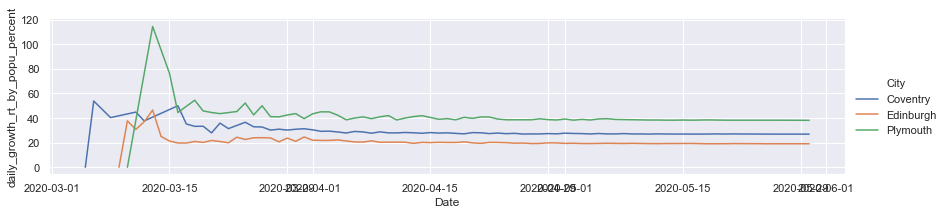

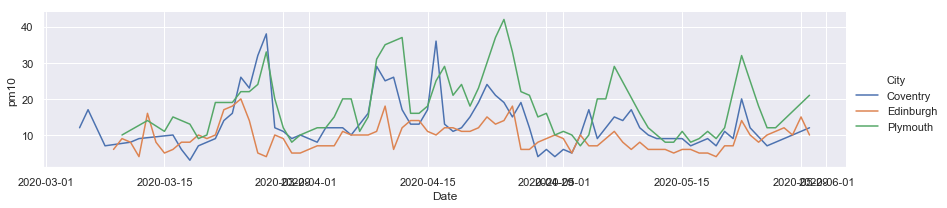

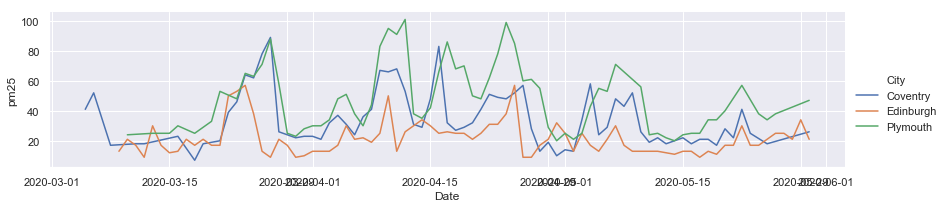

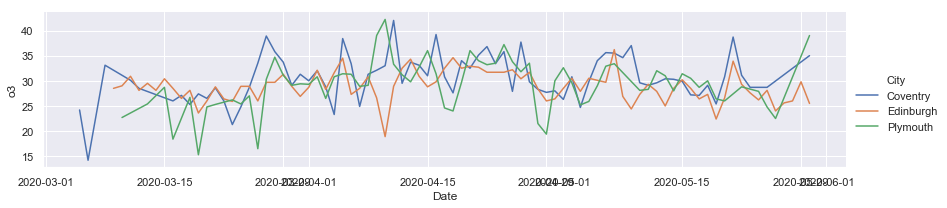

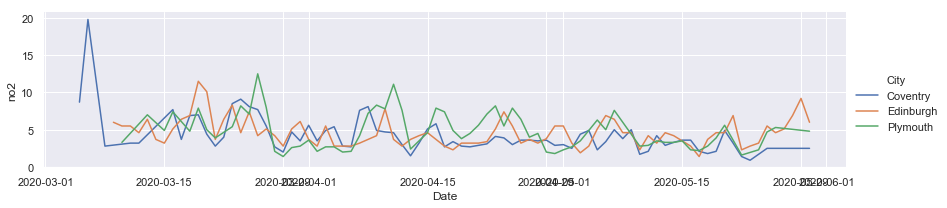

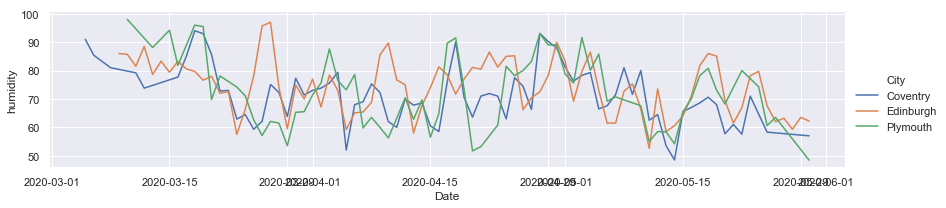

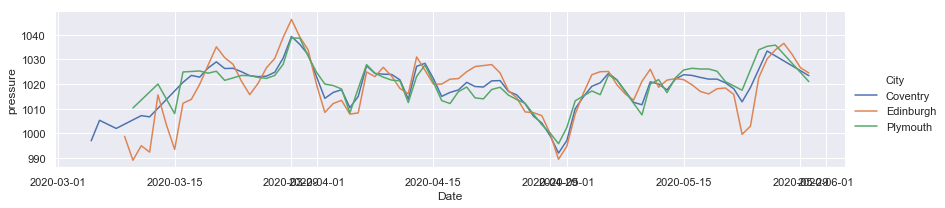

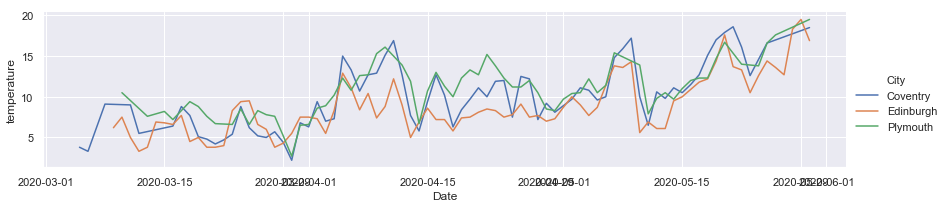

In [42]:
## Plot the data for a few cities - Edinburgh is less polluted compared to Plymouth
cities=['Plymouth','Edinburgh','Coventry']
df_aq_cd_with_metric_plot_3=df_aq_cd_with_metric[df_aq_cd_with_metric.City.isin(cities)]
sns.relplot(x="Date", y="daily_growth_rt_by_popu_percent", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");
sns.relplot(x="Date", y="pm10", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");
sns.relplot(x="Date", y="pm25", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line"); 
sns.relplot(x="Date", y="o3", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line"); 
sns.relplot(x="Date", y="no2", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");
sns.relplot(x="Date", y="humidity", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");
sns.relplot(x="Date", y="pressure", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");
sns.relplot(x="Date", y="temperature", hue="City", height=3,aspect=4,data=df_aq_cd_with_metric_plot_3,kind="line");

#### 4.1.4 Correlation between NO2 and Covid-19 metric
In this section, we further explore the relationship between `NO2` (x variable) and `daily_growth_rt_by_popu_percent` (y variable) in the following three diagrams. 

+ **Figure 1** - Scatter plot for `NO2` vs `daily_growth_rt_by_popu_percent` for 3 cities
    
    This diagram shows a weak correlation for all 3 cities
    
    
+ **Figure 2** - Scatter plot for `NO2` vs `daily_growth_rt_by_popu_percent` for all cities
    
    These set of diagrams will potentially allow us to identify outliers - clearly, the data range for Cardiff and London is different from the rest of the cities. Considering these two cities data as outliers, we will apply filters as `5<=y<=95 and x<=15`, before plotting the data for all the cities. Please see Figure 3 below. 
    
    
+ **Figure 3** - Scatter plot for `NO2` vs `daily_growth_rt_by_popu_percent` for all cities after removing outliers
   
   From the following figures, it is clear that there is a weak correlation between `NO2` and `daily_growth_rt_by_popu_percent`.

Figure 1 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for 3 cities


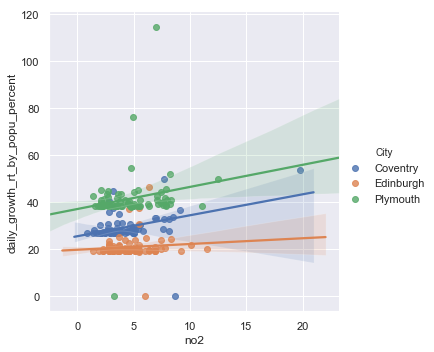

In [43]:
print("Figure 1 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for 3 cities")
sns.lmplot(x="no2", y="daily_growth_rt_by_popu_percent", hue="City", data=df_aq_cd_with_metric_plot_3)

Figure 2 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for all cities


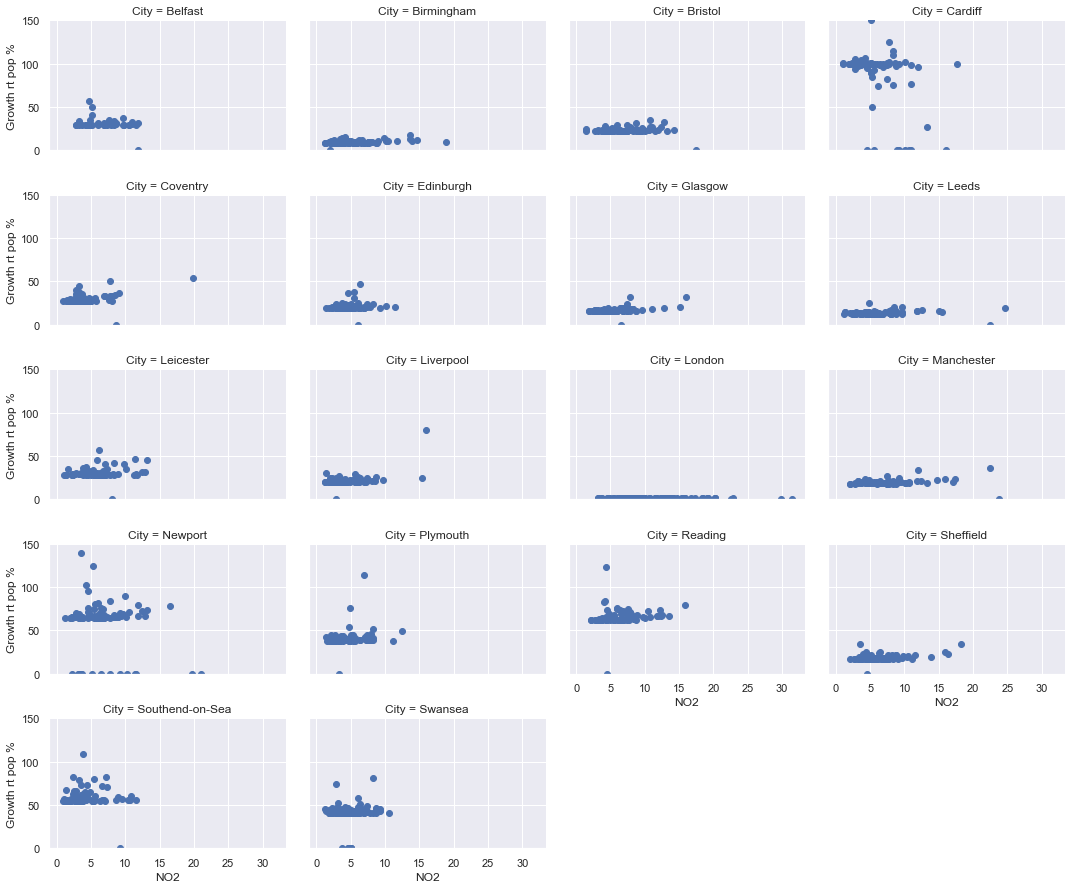

In [44]:
print("Figure 2 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for all cities")
#df_aq_cd_with_metric = df_aq_cd_with_metric[(df_aq_cd_with_metric.no2<=20)]
g=sns.FacetGrid(df_aq_cd_with_metric, col="City", aspect=1.5,col_wrap=4, height=2.5 , ylim=(0, 150))
g=g.map(plt.scatter,"no2", "daily_growth_rt_by_popu_percent", alpha=1.0)
g=g.add_legend()
# rename daily_growth_rt_by_popu_percent to "Growth rt pop %" to fit into the figures
g=g.set_axis_labels("NO2","Growth rt pop %")

Size of the dataset before removing outliers (1464, 16)
Size of the dataset after removing outliers (1212, 16)

Figure 3 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for all cities after removing outliers


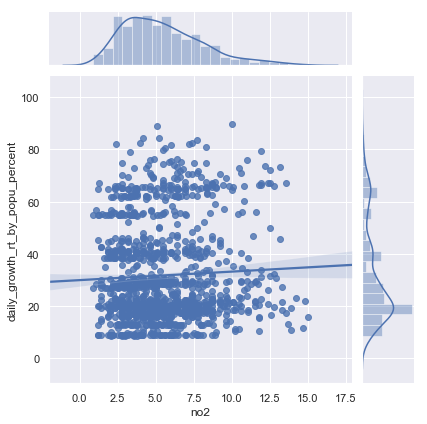

In [46]:
print("Size of the dataset before removing outliers",df_aq_cd_with_metric.shape)
df_aq_cd_with_metric_no2 = df_aq_cd_with_metric[(df_aq_cd_with_metric.no2<=15)]
df_aq_cd_with_metric_no2 = df_aq_cd_with_metric_no2[(df_aq_cd_with_metric_no2.daily_growth_rt_by_popu_percent<=90)]
df_aq_cd_with_metric_no2 = df_aq_cd_with_metric_no2[(df_aq_cd_with_metric_no2.daily_growth_rt_by_popu_percent>=5)]
sns.jointplot(x="no2", y="daily_growth_rt_by_popu_percent", data=df_aq_cd_with_metric_no2,kind="reg");
print("Size of the dataset after removing outliers",df_aq_cd_with_metric_no2.shape)
print("\nFigure 3 - Scatter plot for NO2 vs daily_growth_rt_by_popu_percent for all cities after removing outliers")

#### 4.1.5 Correlation between all air quality parameters and Covid-19 metric

In this section, we have explored the relationship of all the air quality parameter with Covid-19 metric. Same joint plots have been used to visualise the data. The following changes have been incorporated in the dataset before plotting the data.

+ Two cities (London and Louton) data have been excluded from the dataset due to boundary conditions (see below).
+ Outliers excluded from the data for each air quality parameter to focus on the core mass of the data
+ As London's data has been dropped, and all cities' data are merged into the following jointplots, a different metric `daily_growth_rt_percent` has been used here to explore the relationship. 

The set of diagrams has been split into two groups for display purposes only.

size of the dataste before excluding outliers (1464, 16)
size of the dataste after excluding outliers (1144, 16)


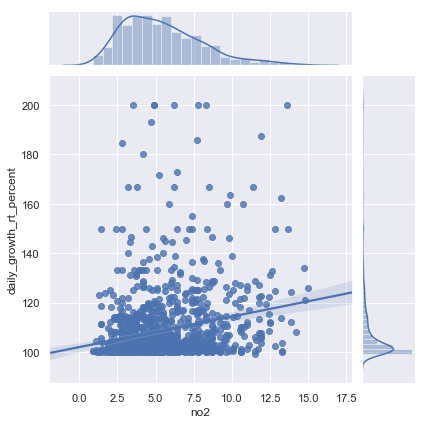

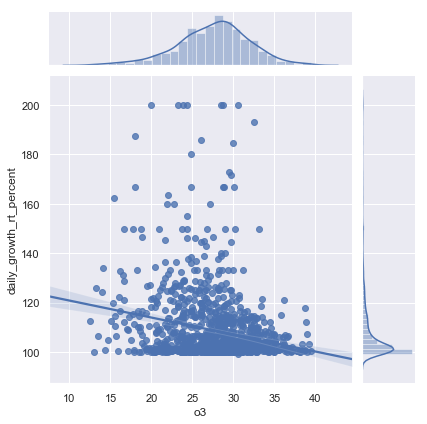

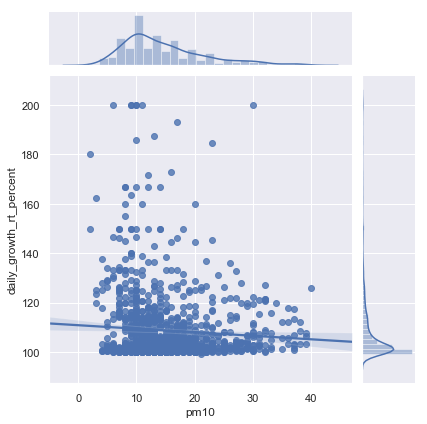

In [47]:
# Louton has only 3 records in air quality dataset and London's TotalCases are too high
# Drop London and Louton for missing data and boundary conditions of data
city_list=['Belfast','Birmingham','Bristol','Cardiff','Coventry','Edinburgh', \
           'Glasgow','Leeds','Leicester','Liverpool','Manchester','Newport','Norwich','Plymouth',\
           'Preston','Reading','Sheffield','Southend-on-Sea','Swansea']


df_aq_cd_with_metric_plot=df_aq_cd_with_metric[df_aq_cd_with_metric.City.isin(city_list)]

#Exclude outliers to focus on the mass of data (same filter as applied in the section 4.1.4 )
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.daily_growth_rt_by_popu_percent<=90)]
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.daily_growth_rt_by_popu_percent>=5)]
#df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.daily_growth_rt_percent>=100)]

#same filter for No2 as applied in the section 4.1.4
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.no2<=15)] 
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.o3<=40)]
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.pm10<=40)]
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.pm25<=90)]
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.humidity>=40)]
df_aq_cd_with_metric_plot = df_aq_cd_with_metric_plot[(df_aq_cd_with_metric_plot.pressure<=1040)]
print('size of the dataste before excluding outliers',df_aq_cd_with_metric.shape)
print('size of the dataste after excluding outliers',df_aq_cd_with_metric_plot.shape)

metric_name="daily_growth_rt_percent"
h=4
g1=sns.jointplot(x="no2", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
g2=sns.jointplot(x="o3", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
g3=sns.jointplot(x="pm10", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
#g4=sns.jointplot(x="pm25", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
#g5=sns.jointplot(x="humidity", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
#g6=sns.jointplot(x="temperature", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
#g7=sns.jointplot(x="pressure", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");

Size of df_aq_cd_with_metric_plot (1144, 16)


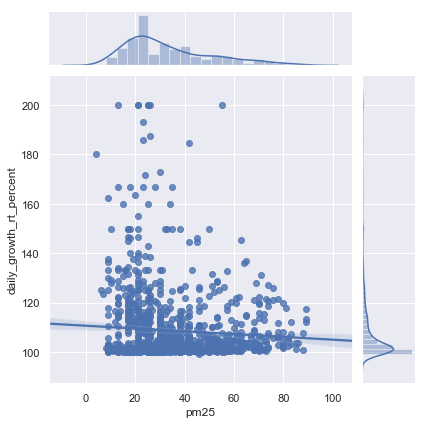

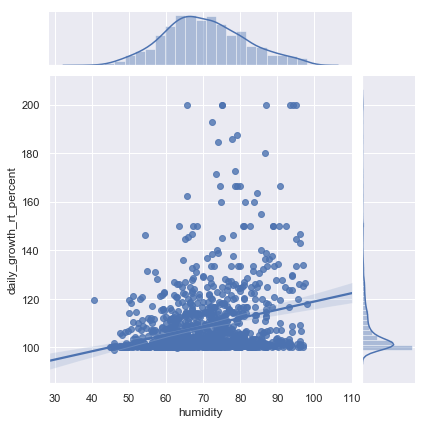

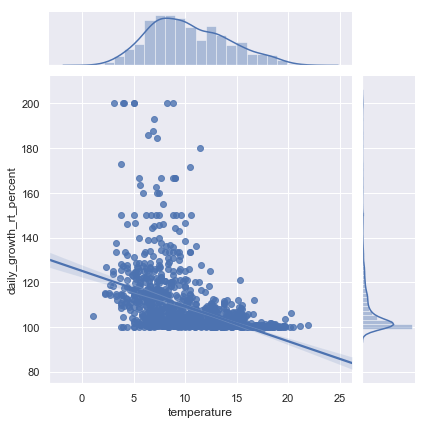

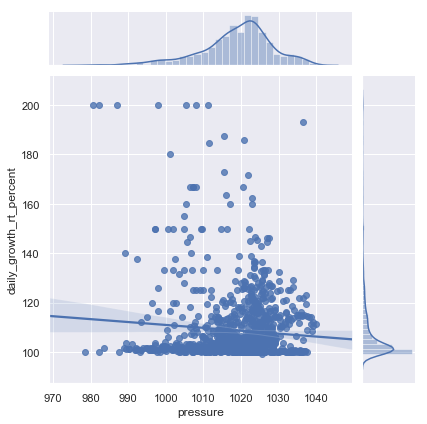

In [16]:
g4=sns.jointplot(x="pm25", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
g5=sns.jointplot(x="humidity", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
g6=sns.jointplot(x="temperature", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
g7=sns.jointplot(x="pressure", y=metric_name, data=df_aq_cd_with_metric_plot,kind="reg");
print('Size of df_aq_cd_with_metric_plot',df_aq_cd_with_metric_plot.shape)

#### 4.1.6 Correlation coefficient and model fitting
The jointplots in the previous section, show a weak realtionship in the data. In this section, we will carry out the following steps to explore further :

+ **Step 1 -**   Find out Pearson's correlation coefficients between air quality parameters (`'no2', 'o3', 'pm10', 'pm25', 'humidity' , 'temperature' ,'pressure'` ) and `daily_growth_rt_percent`. 


+ **Step 2 -**   Fit a Multivariate LinearRegression() model - So far we have checked the correlation between one air quality parameter and Covid-19 metric. We will now train a model with all air quality parameters to explore if the combined relationship (multivariate) with `daily_growth_rt_percent` is significant or not.


+ **Step 3 -**   Fit a Multi-variate RandomForestRegressor () model - Same as step2 but with a random forest regressor.

X variables are: `'no2', 'o3', 'pm10', 'pm25', 'humidity' , 'temperature' ,'pressure'`

y variable is  : `daily_growth_rt_percent`

In [48]:
#1.0 find out Pearson's correlation coefficients
metric_list=['daily_growth_rt_percent']
input_param_list=['no2','o3','pm10','pm25','humidity','temperature','pressure']
print('Size of df_aq_cd_with_metric_plot',df_aq_cd_with_metric_plot.shape)
for metric_name in metric_list:
    #print("\nCorrelation between X variables and ",metric_name)
    for i in input_param_list:
        x = (df_aq_cd_with_metric_plot[i])
        y = (df_aq_cd_with_metric_plot[metric_name])
        print ('Correlation coefficient(r) between',metric_name,'and',i,'is {:0.2f}'.format(np.corrcoef(x,y)[1,0]))

Size of df_aq_cd_with_metric_plot (1144, 16)
Correlation coefficient(r) between daily_growth_rt_percent and no2 is 0.22
Correlation coefficient(r) between daily_growth_rt_percent and o3 is -0.21
Correlation coefficient(r) between daily_growth_rt_percent and pm10 is -0.07
Correlation coefficient(r) between daily_growth_rt_percent and pm25 is -0.07
Correlation coefficient(r) between daily_growth_rt_percent and humidity is 0.25
Correlation coefficient(r) between daily_growth_rt_percent and temperature is -0.41
Correlation coefficient(r) between daily_growth_rt_percent and pressure is -0.08


In [49]:
# 2.0 fit a linear regression model
metric_name="daily_growth_rt_percent"
X_all = (df_aq_cd_with_metric_plot[input_param_list])
y_all = (df_aq_cd_with_metric_plot[metric_name])

kf = KFold(n_splits=5, shuffle=True, random_state=0)
lm_mv_cv = LinearRegression(normalize=True)
predicted_mv_cv = cross_val_predict(lm_mv_cv, X_all, y_all, cv=kf)
lm_mv_cv.fit(X_all, y_all)

print ("Size of X and y matrix:- ",X_all.shape,y_all.shape)
print ('\nMultivariate linear model:\n')
print('Coefficient of Determination (R^2): %.2f' %lm_mv_cv.score(X_all,y_all))
print("Mean squared error(RMSE): %.2f"  %mean_squared_error(y_all, predicted_mv_cv))
print("Mean absolute error(MAE): %.2f"  %mean_absolute_error(y_all, predicted_mv_cv))

print ('\nMultivariate Random Forest LinearRegressor:\n')
rf_mv_cv = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
predicted_rf_mv_cv = cross_val_predict(rf_mv_cv, X_all, y_all, cv=kf)
rf_mv_cv.fit(X_all, y_all)

#print('Correlation Coeffcient',np.corrcoef(X_all,y_all))
print('Coefficient of Determination (R^2): %.2f' %rf_mv_cv.score(X_all, y_all))
print("Mean squared error: %.2f"  %mean_squared_error(y_all, predicted_rf_mv_cv))
print("Mean absolute error: %.2f"  %mean_absolute_error(y_all, predicted_rf_mv_cv))


Size of X and y matrix:-  (1144, 7) (1144,)

Multivariate linear model:

Coefficient of Determination (R^2): 0.22
Mean squared error(RMSE): 168.55
Mean absolute error(MAE): 7.94

Multivariate Random Forest LinearRegressor:

Coefficient of Determination (R^2): 0.26
Mean squared error: 172.62
Mean absolute error: 7.54


#### 4.1.7 Conclusion of Iteration 1

To summarise, in iteration 1; the jointplots in the section 4.1.5 and the correlation coefficients in the section 4.1.6, show a clear but weak relationship between air quality parameters `NO2, O3, humidity and temperature` with the Covid-19 metric `daily_growth_rt_percent` ( (TotalCases today/TotalCases yesterday) * 100 ). However, this result needs to be validated with more data from other countries.  

The multivariate regressors produced a very low score (Coefficient of Determination). Therefore, in the second iteration, we will only focus on the univariate analysis, but with a different joining criteria between air quality and Covid-19 datasets.   

### 4.2 Iteration 2

In iteration 2, we continue the investigation on the same Covid-19 metric `daily_growth_rt_percent`. However, three new air quality parameters `SO2`, `merged_wind_speed` and `merged_wind_gust` have been added in the combined dataset.  

#### 4.2.1 Join air quality and Covid-19 datasets with 7 days lag

The air quality data and Covid-19 data have been joined based on attributes `City` and `Date` in the first iteration. However, the impact of poor air quality (e.g. high NO2 concentration, high humidity) may be reflected in the total number of infected cases after several days.

Therefore, in this iteration, a lag of 7 days has been factored in i.e. air quality metrics observed/reported on 01/04/2020 has been joined with total cases of Covid-19 reported on 08/04/2020. 

The combined dataset used in iteration 2, has been created externally in Microsoft Excel with the above join criteria by using the original datasets `covid_data_till_may.csv` and `airqua_data_till_may.csv`. Wind speed and wind gust data is split into separate columns `wind_gust`,`wind-gust`,`wind-speed`,`wind_speed` in the file `airqua_data_till_may.csv`. These columns have been merged into columns `merged_wind_speed` and `merged_wind_gust` in the input dataset for iteration 2.


In [60]:
#Read input file for iteration 2 ( with Day+7 matching criteria )
df_aq_day1_joined_cd_day7_with_metrics=pd.read_csv("C:\\3-knowledge\\Hackathon\\UK\\Python\\aq_day1_joined_cd_day7_with_metrics.csv", delimiter = ',')
print('Shape of the dataset =', df_aq_day1_joined_cd_day7_with_metrics.shape)
print('\nSample records from the new combined dataset')
df_aq_day1_joined_cd_day7_with_metrics.head(10)

Shape of the dataset = (1552, 19)

Sample records from the new combined dataset


,Date,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,merged_wind_gust,merged_wind_speed,Dplus7,Dplus7City,TotalCases,Population,daily_growth_rt_percent
0,19/03/2020,Belfast,2.5,1.0,80.0,12.4,19.1,20.0,30.0,1030.0,1.6,3.0,NaN,2.5,26/03/2020,43916Belfast,75.0,340220.0,0.000000
1,20/03/2020,Belfast,2.6,0.0,75.0,11.9,19.9,18.0,25.0,1033.0,1.6,5.0,NaN,4.8,27/03/2020,43917Belfast,86.0,340220.0,114.666667
2,23/03/2020,Belfast,3.3,4.5,81.0,9.2,19.5,29.0,NaN,1021.0,1.7,8.0,NaN,4.3,30/03/2020,43920Belfast,160.0,340220.0,186.046512
3,24/03/2020,Belfast,3.0,5.5,72.5,5.5,27.4,32.0,NaN,1016.0,1.6,10.0,12.8,5.1,31/03/2020,43921Belfast,166.0,340220.0,103.750000
4,25/03/2020,Belfast,3.1,7.5,87.0,12.0,24.2,25.0,50.0,1021.0,1.8,10.0,NaN,4.3,01/04/2020,43922Belfast,200.0,340220.0,120.481928
5,26/03/2020,Belfast,NaN,5.5,81.0,11.9,17.1,17.0,30.0,1026.0,0.9,7.5,NaN,4.1,02/04/2020,43923Belfast,226.0,340220.0,113.000000
6,27/03/2020,Belfast,0.7,6.0,87.0,8.3,15.5,14.0,21.0,1029.0,1.1,8.0,NaN,4.8,03/04/2020,43924Belfast,272.0,340220.0,120.353982
7,30/03/2020,Belfast,NaN,3.0,75.0,5.5,NaN,16.0,35.0,1040.0,0.9,7.5,NaN,4.8,06/04/2020,43927Belfast,377.0,340220.0,138.602941
8,31/03/2020,Belfast,NaN,2.5,72.5,4.7,32.5,17.0,23.0,1036.5,0.7,7.0,NaN,3.3,07/04/2020,43928Belfast,396.0,340220.0,105.039788
9,01/04/2020,Belfast,0.9,3.5,78.5,4.9,29.7,11.0,21.0,1024.5,0.6,8.0,NaN,4.1,08/04/2020,43929Belfast,429.0,340220.0,108.333333


In [61]:
# Check basic statistics
#print('df_aq_day1_joined_cd_day7_with_metrics.columns)
df_aq_day1_joined_cd_day7_with_metrics.describe()
#df_aq_day1_joined_cd_day7_with_metrics.columns

,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,merged_wind_gust,merged_wind_speed,TotalCases,Population,daily_growth_rt_percent
count,667.000000,432.000000,1453.000000,1527.000000,1522.000000,1522.00000,1516.000000,1453.000000,1189.000000,1453.000000,1344.000000,1437.000000,1527.000000,1.527000e+03,1527.000000
mean,2.806597,4.315972,71.697798,6.444270,26.678252,15.25887,34.485488,1019.168754,2.325315,9.496972,8.206473,3.609743,1853.635232,1.084972e+06,104.485972
std,2.896553,3.214533,12.720999,3.939988,5.518260,7.97440,19.534562,23.153779,1.795404,3.647640,4.846850,2.409349,4567.323726,2.250972e+06,34.426808
min,0.200000,-4.000000,10.000000,0.900000,1.300000,2.00000,4.000000,973.100000,0.200000,1.100000,0.100000,0.200000,0.000000,1.546760e+05,0.000000
25%,1.100000,2.000000,64.300000,3.700000,24.000000,10.00000,21.000000,1011.300000,1.100000,6.900000,4.500000,2.000000,116.500000,2.621000e+05,100.552486
50%,2.400000,4.500000,71.500000,5.500000,27.400000,13.00000,30.000000,1018.600000,1.900000,9.100000,7.100000,3.000000,647.000000,4.633770e+05,102.348066
75%,3.600000,6.500000,80.600000,7.900000,30.100000,19.00000,46.000000,1023.800000,3.100000,12.200000,10.900000,4.700000,1712.000000,5.848530e+05,111.236616
max,22.100000,12.500000,98.000000,31.500000,55.000000,54.00000,144.000000,1197.600000,25.900000,22.300000,28.600000,15.000000,26989.000000,8.961989e+06,600.000000


#### 4.2.2 Drop blank values and outliers from combined dataset

In this section, we have dropped sparsely populated columns `co` and `dew` first before dropping the blank values. We then removed the blank values (NaN) and outliers (same filter as iteration 1) to focus on the core mass of the data.


In [62]:
print('Shape of the dataset before removing blank values and outliers =',df_aq_day1_joined_cd_day7_with_metrics.shape)

#drop sparsely populated columns
df_aq_day1_joined_cd_day7_with_metrics_nona=df_aq_day1_joined_cd_day7_with_metrics.drop(['co','dew'],\
                                                                                        axis=1,inplace=False)
#drop blank values
df_aq_day1_joined_cd_day7_with_metrics_nona=df_aq_day1_joined_cd_day7_with_metrics_nona.dropna()

#drop outliers
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.daily_growth_rt_percent>=100)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.daily_growth_rt_percent<=150)]

df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.so2<=7.5)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.no2<=15)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.o3<=40)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.pm10<=40)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.pm25<=90)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.humidity>=40)]
df_aq_day1_joined_cd_day7_with_metrics_nona = df_aq_day1_joined_cd_day7_with_metrics_nona[(df_aq_day1_joined_cd_day7_with_metrics_nona.pressure<=1040)]
print('Shape of the dataset after removing blank values and outliers =', \
      df_aq_day1_joined_cd_day7_with_metrics_nona.shape)

Shape of the dataset before removing blank values and outliers = (1552, 19)
Shape of the dataset after removing blank values and outliers = (878, 17)


#### 4.2.3 Correlation coefficient and model fitting
In this section, we will repeat the same steps performed in the section 4.1.6 of iteration 1, but with additional air quality parameters, new join criteria and with a slightly less number of records. 

+ **Step 1 -**   Find out Pearson's correlation coefficients between air quality parameters (`'so2', 'no2', 'o3', 'pm10', 'pm25', 'humidity' , 'temperature' ,'pressure', 'merged_wind_gust','merged_wind_speed' ` ) and `daily_growth_rt_percent`. 


+ **Step 2 -**   Fit a Multivariate LinearRegression() model - So far we have checked the correlation between one air quality parameter and Covid-19 metric. We will now train a model with all air quality parameters to explore if the combined relationship (multivariate) with `daily_growth_rt_percent` is significant or not.


+ **Step 3 -**   Fit a Multivariate RandomForestRegressor () model - Same as step2 but with a random forest regressor.

X variables are: `'so2','no2','o3','pm10','pm25','humidity','temperature','pressure','merged_wind_gust','merged_wind_speed'`

y variable is  : `daily_growth_rt_percent`

In [63]:
input_param_list=['so2','no2','o3','pm10','pm25','humidity','temperature','pressure',\
                  'merged_wind_gust','merged_wind_speed']

metric_name='daily_growth_rt_percent'


#print ("\nCorrelation coefficient for metric",metric_name)
for i in input_param_list:
    x = (df_aq_day1_joined_cd_day7_with_metrics_nona[i])
    y = (df_aq_day1_joined_cd_day7_with_metrics_nona[metric_name])
    #print (i,' - Correlation coefficient is {:0.2f}'.format(np.corrcoef(x,y)[1,0]))
    print ('Correlation coefficient(r) between',metric_name,'and',i,'is {:0.2f}'.format(np.corrcoef(x,y)[1,0]))

Correlation coefficient(r) between daily_growth_rt_percent and so2 is -0.03
Correlation coefficient(r) between daily_growth_rt_percent and no2 is 0.20
Correlation coefficient(r) between daily_growth_rt_percent and o3 is -0.27
Correlation coefficient(r) between daily_growth_rt_percent and pm10 is -0.17
Correlation coefficient(r) between daily_growth_rt_percent and pm25 is -0.17
Correlation coefficient(r) between daily_growth_rt_percent and humidity is 0.36
Correlation coefficient(r) between daily_growth_rt_percent and temperature is -0.44
Correlation coefficient(r) between daily_growth_rt_percent and pressure is -0.16
Correlation coefficient(r) between daily_growth_rt_percent and merged_wind_gust is 0.28
Correlation coefficient(r) between daily_growth_rt_percent and merged_wind_speed is 0.32


In [57]:
X_all = (df_aq_day1_joined_cd_day7_with_metrics_nona[input_param_list])
y_all = (df_aq_day1_joined_cd_day7_with_metrics_nona[metric_name])

kf = KFold(n_splits=5, shuffle=True, random_state=0)
lm_mv_cv = LinearRegression()
predicted_mv_cv = cross_val_predict(lm_mv_cv, X_all, y_all, cv=kf)
lm_mv_cv.fit(X_all, y_all)

print (X_all.shape,y_all.shape)
print ('\nMultivariate linear model\n')
print('Coefficient of Determination (R^2): %.2f' %lm_mv_cv.score(X_all,y_all))
print("Mean squared error(RMSE): %.2f"  %mean_squared_error(y_all, predicted_mv_cv))
print("Mean absolute error(MAE): %.2f"  %mean_absolute_error(y_all, predicted_mv_cv))

print ('\nMultivariate Random Forest LinearRegressor\n')
rf_mv_cv_log_edit = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
predicted_mv_cv_log_edit_rf = cross_val_predict(rf_mv_cv_log_edit, X_all, y_all, cv=kf)
rf_mv_cv_log_edit.fit(X_all, y_all)

#print('Correlation Coeffcient',np.corrcoef(X_all,y_all))
print('Coefficient of Determination (R^2): %.2f' %rf_mv_cv_log_edit.score(X_all, y_all))
print("Mean squared error: %.2f"  %mean_squared_error(y_all, predicted_mv_cv_log_edit_rf))
print("Mean absolute error: %.2f"  %mean_absolute_error(y_all, predicted_mv_cv_log_edit_rf))

(878, 10) (878,)

Multivariate linear model

Coefficient of Determination (R^2): 0.36
Mean squared error(RMSE): 65.53
Mean absolute error(MAE): 5.48

Multivariate Random Forest LinearRegressor

Coefficient of Determination (R^2): 0.34
Mean squared error: 70.93
Mean absolute error: 5.61


#### 4.2.4 Correlation between all air quality parameters and Covid-19 metric

In this section, we have repeated the steps of the section 4.1.5 of iteration 1, i.e. explore the relationship of all the air quality parameter with Covid-19 metric using jointplots. 

The set of diagrams has been split into three groups for display purposes only. 

**A heatmap with all correlation coefficients has also been plotted at the end of this section.**

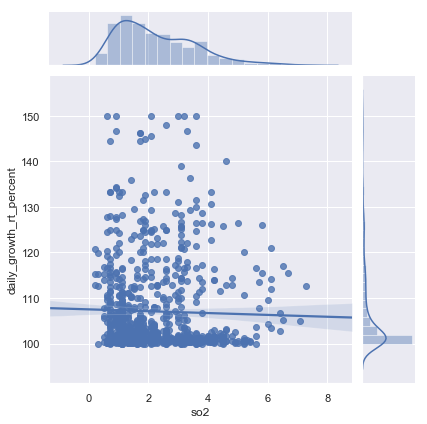

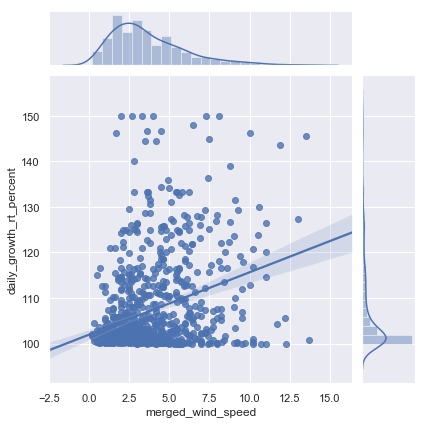

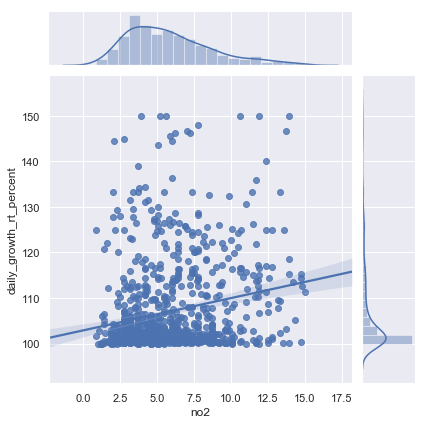

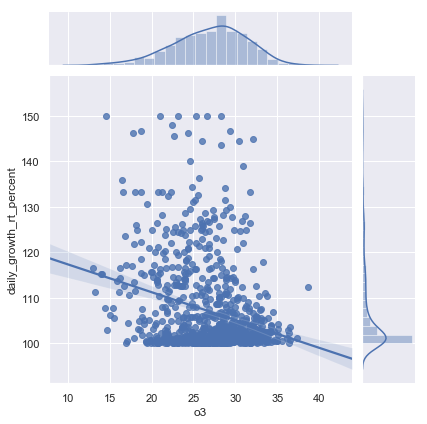

In [64]:
# few counts across cities and hence metric with population
#h=4
sns.jointplot(x="so2", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="merged_wind_speed", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="no2", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="o3", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");

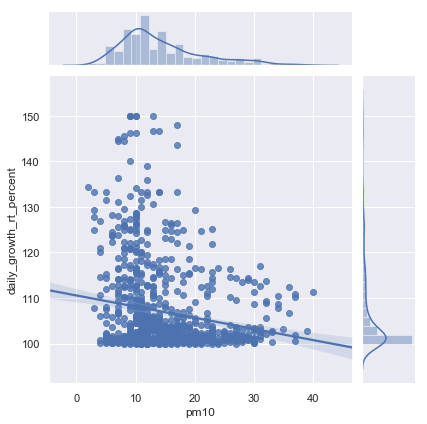

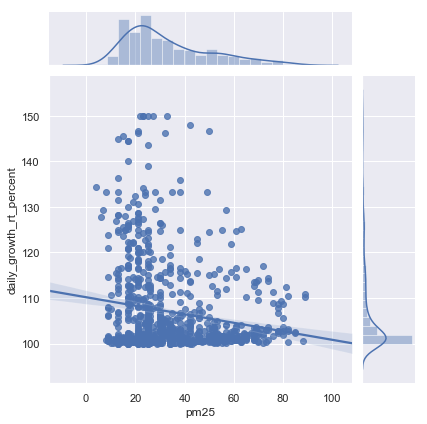

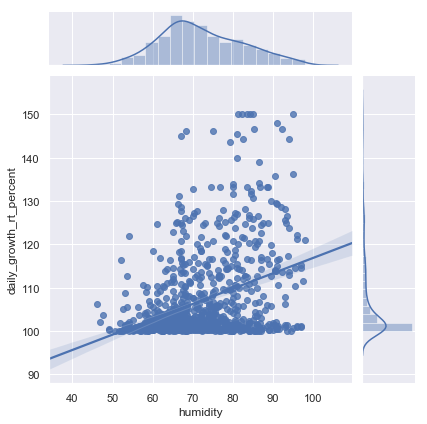

In [21]:
sns.jointplot(x="pm10", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="pm25", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="humidity", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");

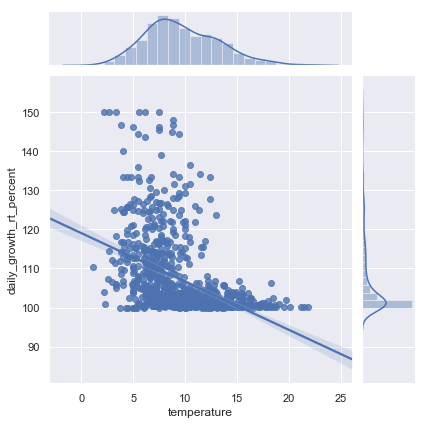

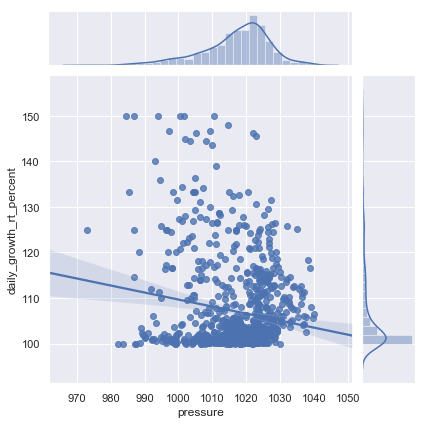

In [22]:
#sns.jointplot(x="humidity", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="temperature", y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg");
sns.jointplot(x="pressure"   , y=metric_name, data=df_aq_day1_joined_cd_day7_with_metrics_nona,kind="reg"); 

Shape of the dataset is  (878, 17)

 Heatmap of correlation coefficients for all variables in the dataset
 -----------------------------------------------------------------------


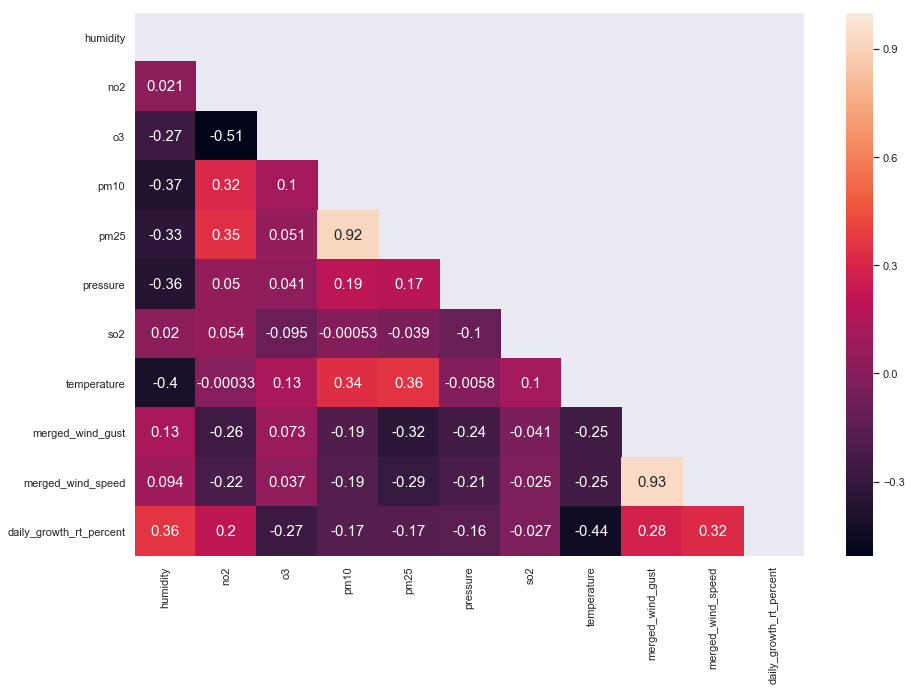

In [65]:
print('Shape of the dataset is ', df_aq_day1_joined_cd_day7_with_metrics_nona.shape)
print("\n Heatmap of correlation coefficients for all variables in the dataset")
print(" -----------------------------------------------------------------------")
plt.figure(figsize = (15,10))
#print(df_aq_day1_joined_cd_day7_with_metrics_nona.corr())
# keep only the relevant metric
df_aq_day1_joined_cd_day7_with_metrics_nona_corr= \
      df_aq_day1_joined_cd_day7_with_metrics_nona.drop(['TotalCases','Population'],axis=1)
matrix = np.triu(df_aq_day1_joined_cd_day7_with_metrics_nona_corr.corr())

sns.heatmap(df_aq_day1_joined_cd_day7_with_metrics_nona_corr.corr(), \
            annot=True, mask=matrix,annot_kws={"size":15})   ##      

#### 4.2.5 Conclusion of Iteration 2

The results of iteration 2 are marginally different from iteration 1 - the values of correlation coefficient (r) and model score are slightly higher than iteration 1 (except for `no2`). However, the values of `r` still fall in the weak correlation range. 

**Iteration 1**

*Correlation coefficient between air quality parameters and Covid-19 `daily_growth_rt_percent`*
+ no2  - Correlation coefficient is 0.22
+ o3  - Correlation coefficient is -0.21
+ humidity  - Correlation coefficient is 0.25
+ temperature  - Correlation coefficient is -0.41


+ Multivariate linear model :- Coefficient of Determination (R^2): 0.22
+ Multivariate Random Forest LinearRegressor :- Coefficient of Determination (R^2): 0.26

**Iteration 2**

*Correlation coefficient between air quality parameters and Covid-19 `daily_growth_rt_percent`*
+ no2  - Correlation coefficient is 0.20
+ o3  - Correlation coefficient is -0.27
+ pm10  - Correlation coefficient is -0.17
+ pm25  - Correlation coefficient is -0.17
+ humidity  - Correlation coefficient is 0.36
+ temperature  - Correlation coefficient is -0.44
+ pressure  - Correlation coefficient is -0.16
+ merged_wind_gust  - Correlation coefficient is 0.28
+ merged_wind_speed  - Correlation coefficient is 0.32 


+ Multivariate linear model: Coefficient of Determination (R^2): 0.36
+ Multivariate Random Forest LinearRegressor:Coefficient of Determination (R^2): 0.34

Iteration 2 can be repeated for other time lags (5,9,11,14...days) as well, this may allow us to understand the full impact of short-term variation of air quality to Covid-19 positive cases. 

Please note the impact of pre-lockdown mobility has not been taken into consideration in this study. People may catch the virus from a city with poor air quality and then they immediately move to a less polluted city where it was tested and detected.

## 5.0 Summarise the key findings

To summarise, both the iterations 1 and 2 support the same observations. The data analysis shows the Covid-19 metric `daily growth rate percentage` derived from the total number of positive cases, has a weak correlation with the following air quality factors -

1. NO2           - daily growth rate increases with the increase of NO2 in the air ( r=0.2)
2. O3            - daily growth rate decreases with the increase of O3 in the air (r=-0.27)
3. PM25 and PM10 - negatively correlated - although r is on the lower side
4. Humidity      - daily growth rate increases with the increase of humidity in the air (r=0.36)
5. Temperature   - daily growth rate increases with the decrease of temperature (r=-0.44)
6. Wind speed    - daily growth rate increases with the increase of wind speed (r=0.32) - perhaps, wind speed helps to spread the virus quickly.

The above findings need to be validated with: 

1. more datasets from other cities and regions from different counties, including suburbs and rural areas. 
2. more COVID-19 metrics such as number of deaths, severity of infections etc.

This study can be extended to include the impact of mobility and time lag sensitivity.

As the infection growth rate depends on temperature, humidity, wind speed and NO2, the social distancing measures must be strictly followed even in the cooler days, humid/windy weather conditions and where the concentration of NO2 is high in the air.




                                   ----- End of the document ------